## Dataset Information

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

**Problem:** Predict purchase amount

## Attributes:
| Column ID |         Column Name        | Data type |           Description           | Masked |
|:---------:|:--------------------------:|:---------:|:-------------------------------:|--------|
|     0     |           User_ID          |   int64   |      Unique Id of customer      | False  |
|     1     |         Product_ID         |   object  |       Unique Id of product      | False  |
|     2     |           Gender           |   object  |         Sex of customer         | False  |
|     3     |             Age            |   object  |         Age of customer         | False  |
|     4     |         Occupation         |   int64   |   Occupation code of customer   | True   |
|     5     |        City_Category       |   object  |         City of customer        | True   |
|     6     | Stay_In_Current_City_Years |   object  | Number of years of stay in city | False  |
|     7     |       Marital_Status       |   int64   |    Marital status of customer   | False  |
|     8     |     Product_Category_1     |   int64   |       Category of product       | True   |
|     9     |     Product_Category_2     |  float64  |       Category of product       | True   |
|     10    |     Product_Category_3     |  float64  |       Category of product       | True   |
|     11    |          Purchase          |   int64   |         Purchase amount         | False  |

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
# statistical info
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
# find unique values
df.apply(lambda x: len(x.unique()))

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,20
Product_Category_2,18


## Exploratory Data Analysis

<Axes: xlabel='Purchase', ylabel='Density'>

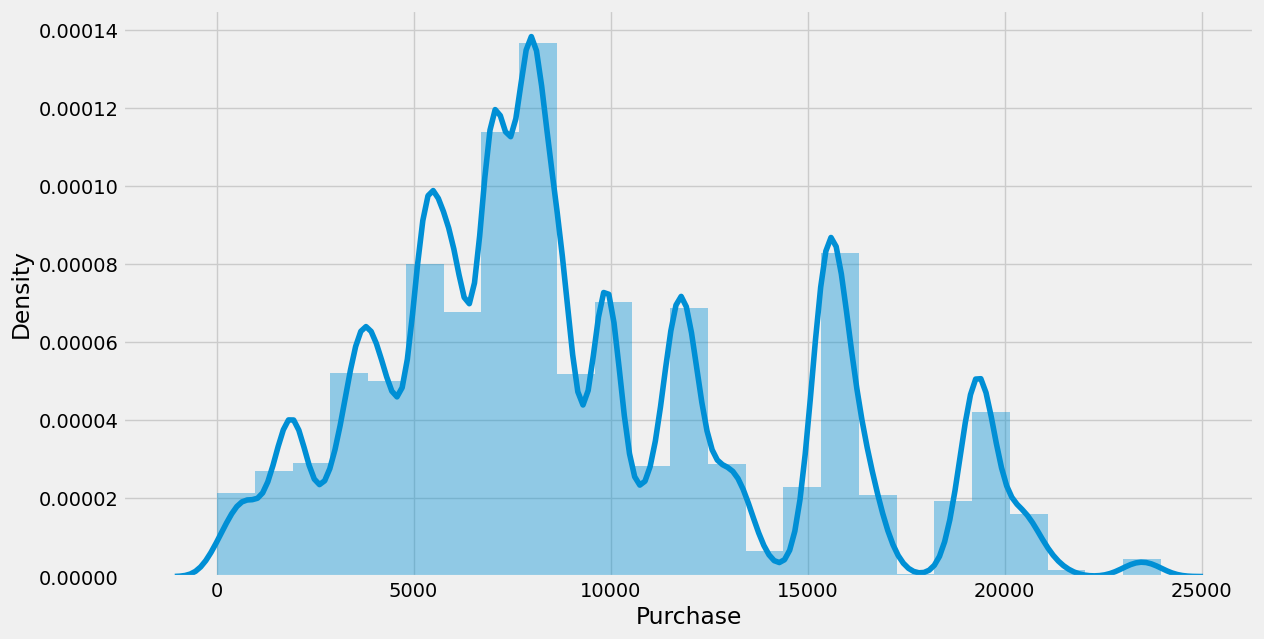

In [ ]:
# distplot for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df['Purchase'], bins=25)

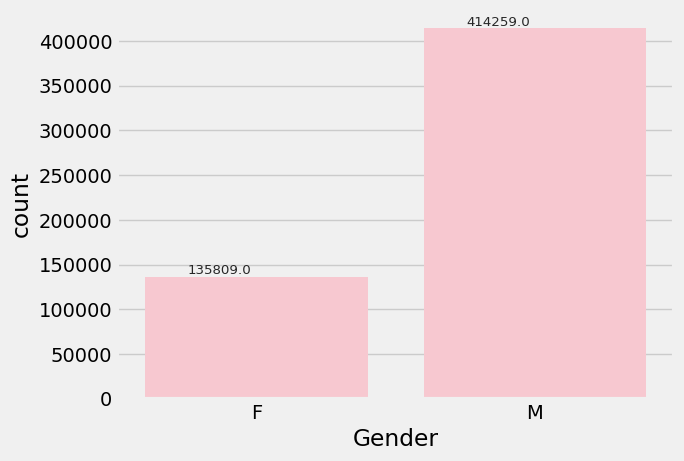

In [ ]:
# distribution of numeric variables
ax = sns.countplot(x=df['Gender'], color='pink')  # Change color as needed
sns.set(font_scale=0.8)
# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 3, p.get_height()),
                ha='center', va='bottom')

plt.show()

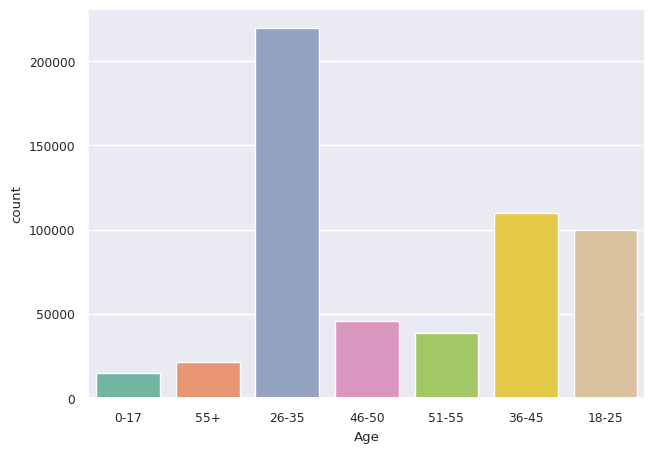

In [ ]:
sns.set(font_scale=0.8)
sns.countplot(x=df['Age'], palette='Set2')  # 'Set2' gives different colors to each bar

plt.show()

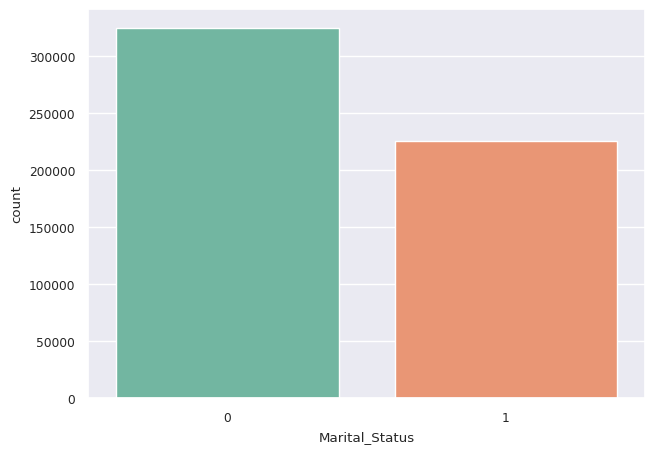

In [ ]:
sns.set(font_scale=0.8)
sns.countplot(x=df['Marital_Status'], palette='Set2')  # Change palette for different colors
plt.show()

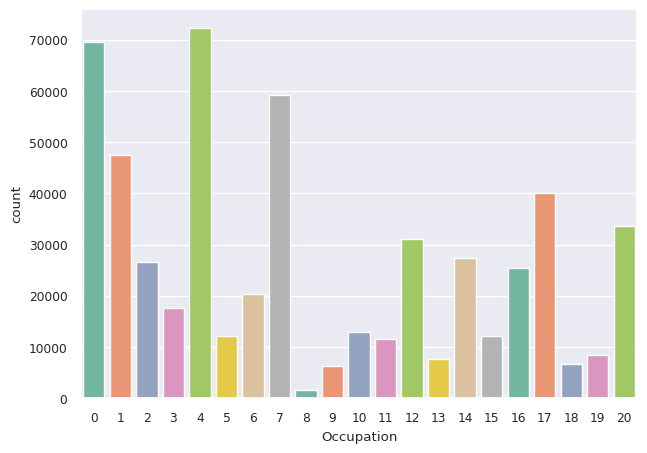

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=0.8)
sns.countplot(x=df['Occupation'], palette='Set2')  # Different colors for each bar

plt.show()


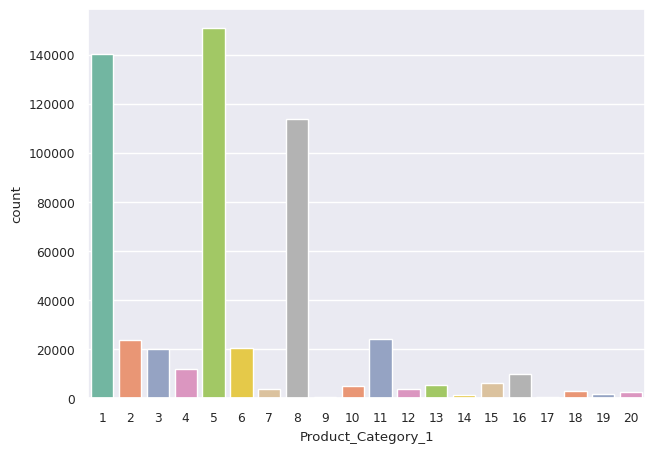

In [ ]:
sns.set(font_scale=0.8)
sns.countplot(data=df, x='Product_Category_1', palette='Set2')  # Different colors for each bar
plt.show()

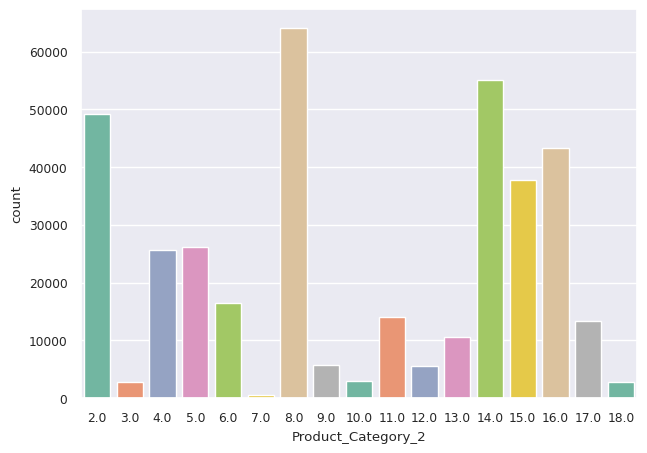

In [ ]:
sns.set(font_scale=0.8)
sns.countplot(data=df, x='Product_Category_2', palette='Set2')  # Different colors for each bar
plt.show()

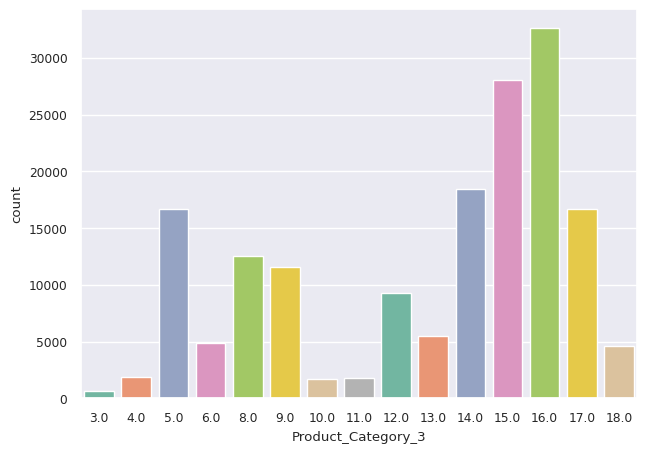

In [ ]:
sns.set(font_scale=0.8)
sns.countplot(data=df, x='Product_Category_3', palette='Set2')  # Different colors for each bar
plt.show()

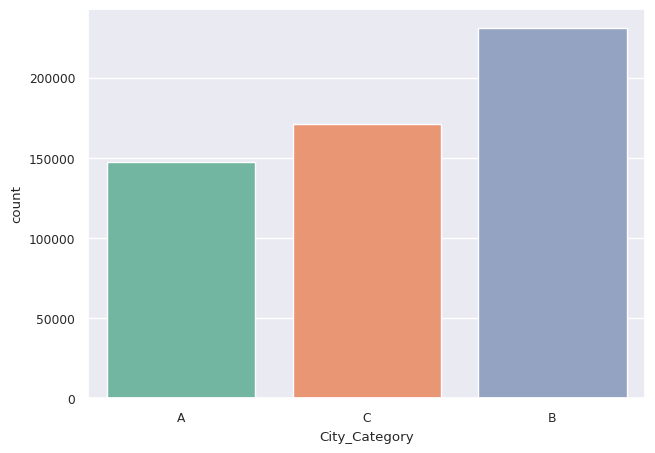

In [ ]:
sns.set(font_scale=0.8)
sns.countplot(data=df, x='City_Category', palette='Set2')  # Different colors for each bar
plt.show()

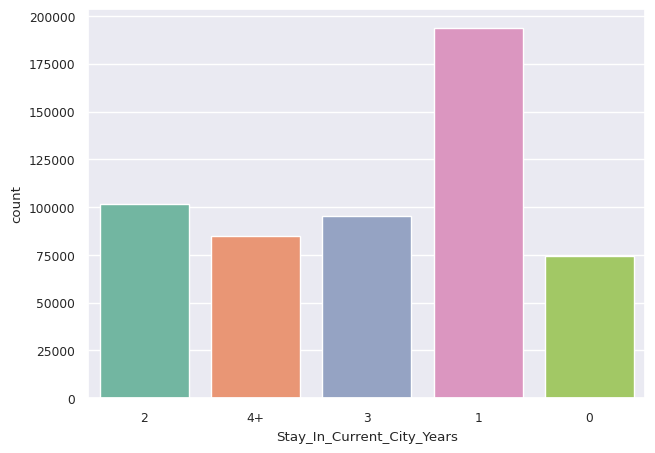

In [ ]:
sns.set(font_scale=0.8)
sns.countplot(data=df, x='Stay_In_Current_City_Years', palette='Set2')  # Different colors for each bar
plt.show()

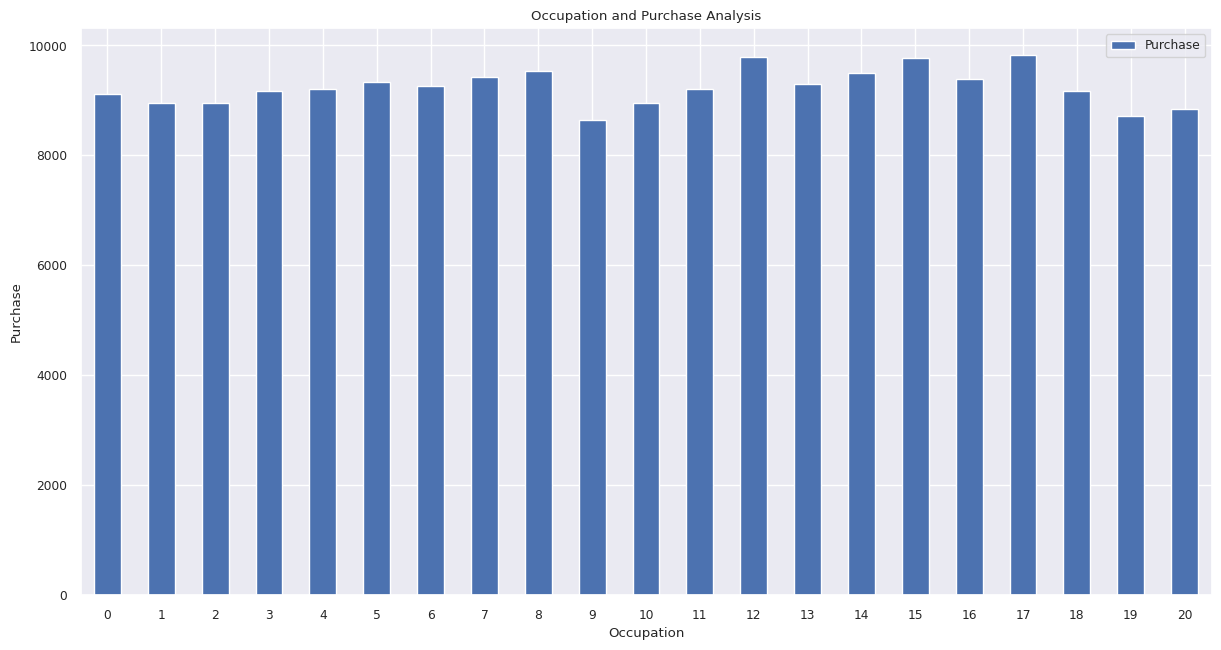

In [ ]:
# bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

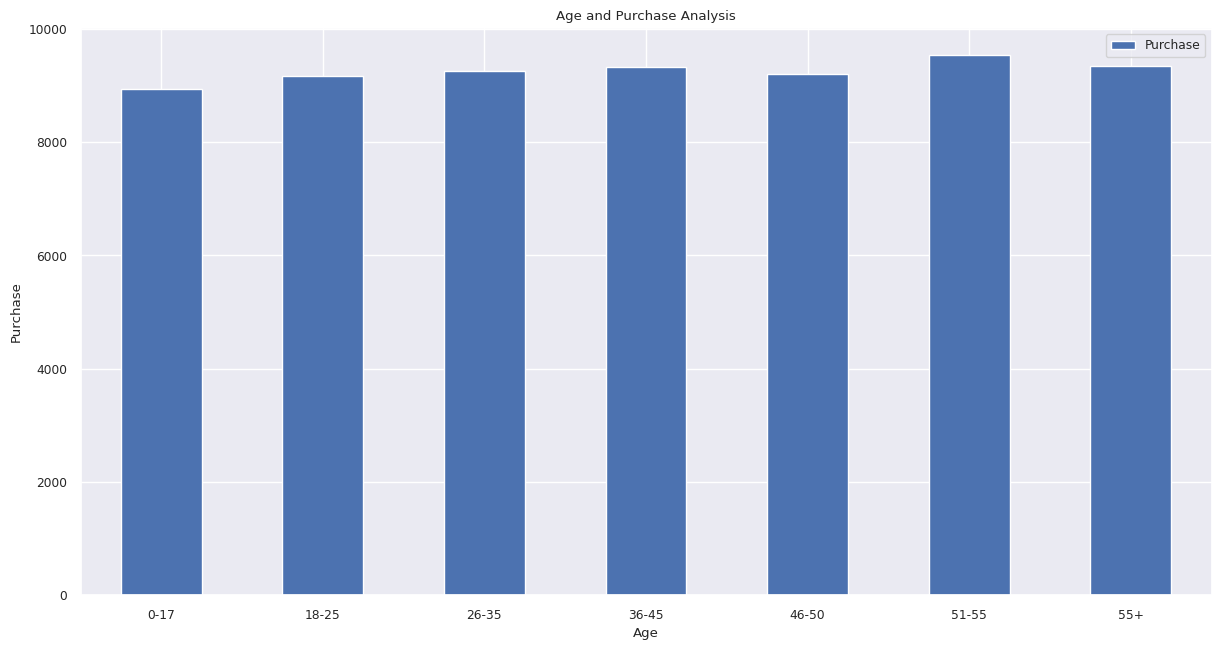

In [ ]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

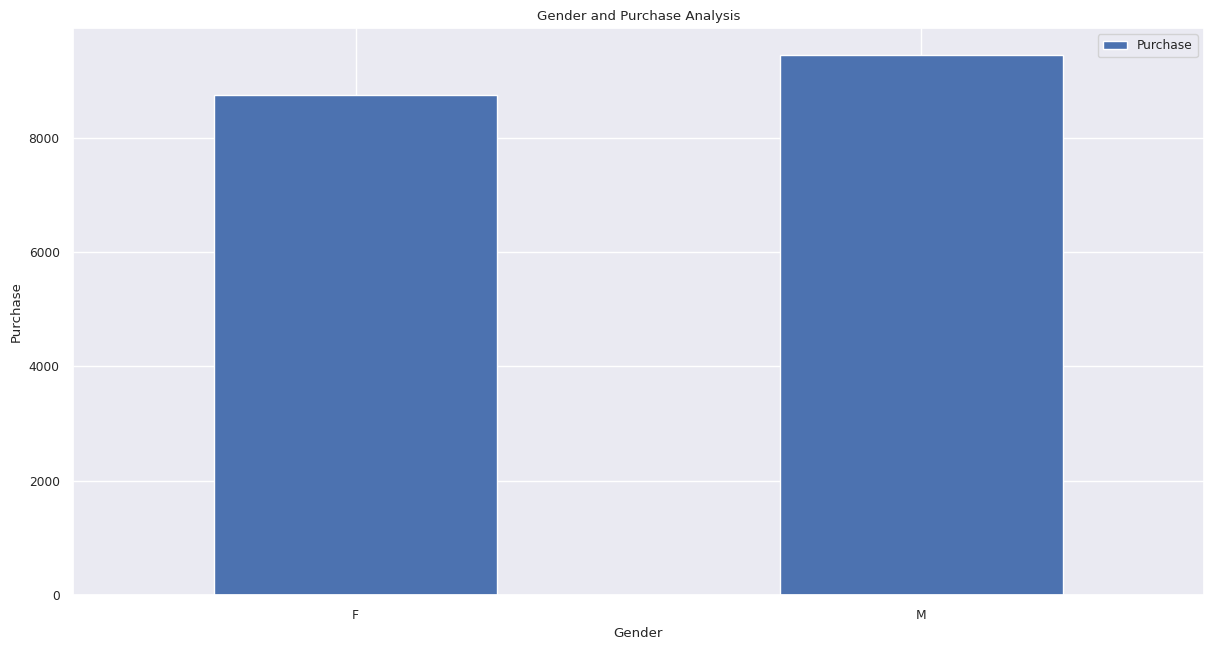

In [ ]:
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

## Preprocessing the dataset

In [ ]:
# check for null values
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


In [ ]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")

In [ ]:
# check for null values
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


In [ ]:
# encoding values using dict
gender_dict = {'F':0, 'M':1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [ ]:
# to improve the metric use one hot encoding
# label encoding
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


## Coorelation Matrix

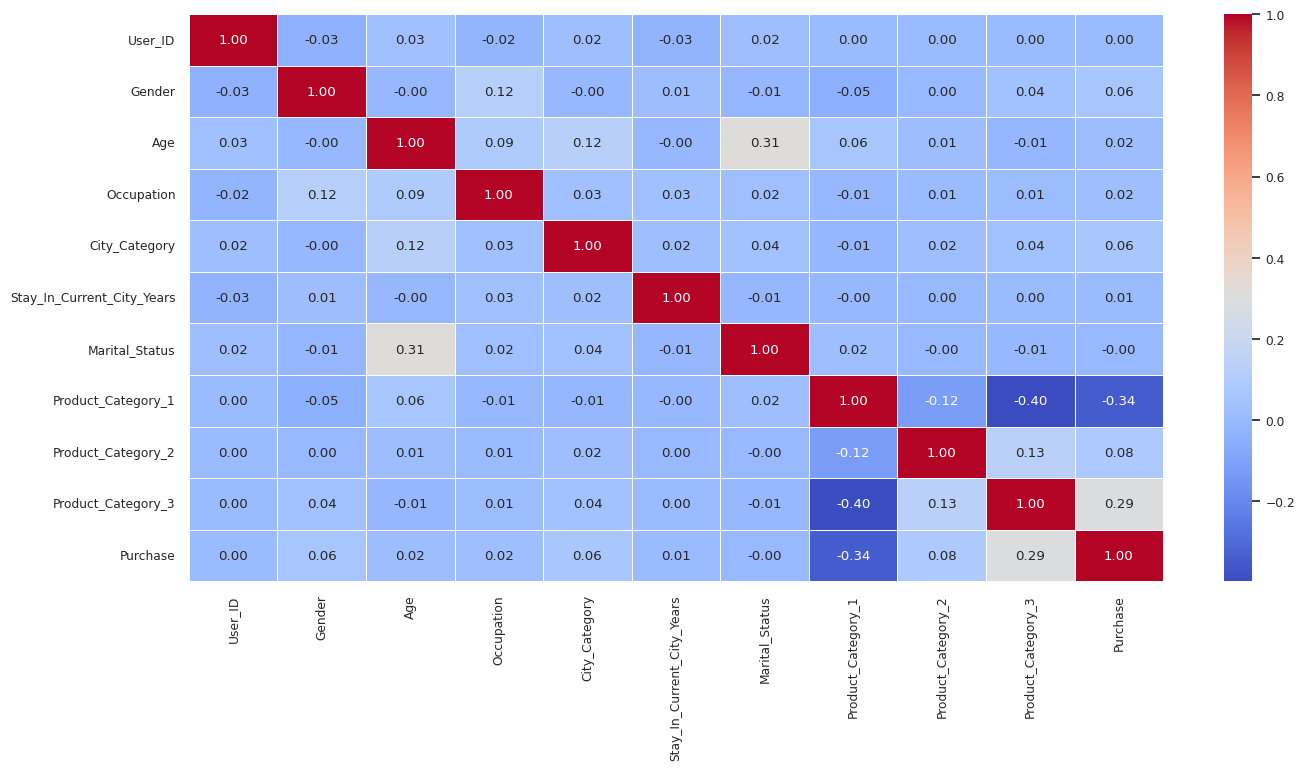

In [ ]:
# Select only numeric columns for correlation
corr = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.show()

## Input Split

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


In [ ]:
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']

## Model Training

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)

    # predict the results
    pred = model.predict(x_test)

    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

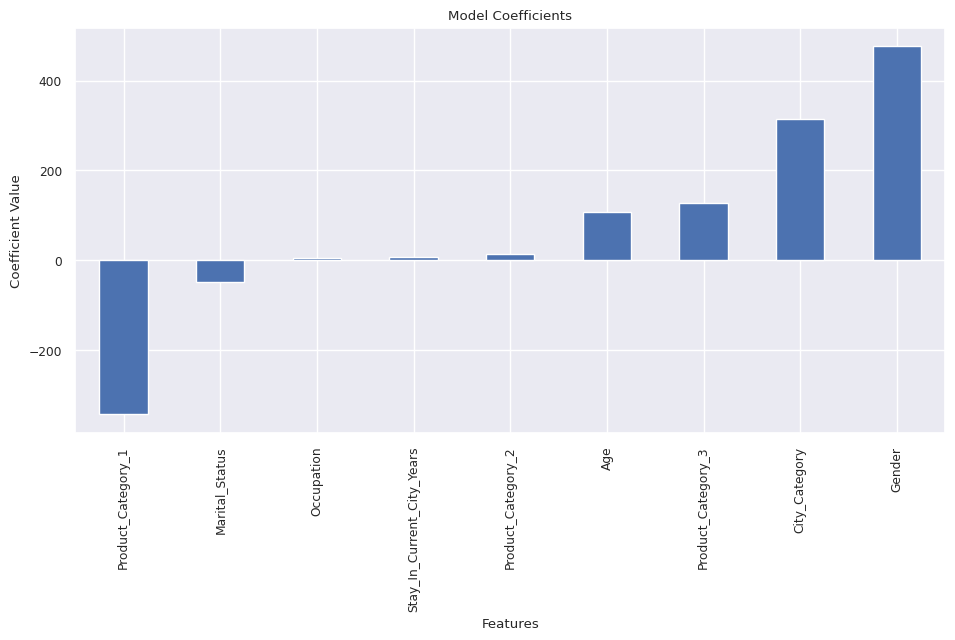

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Initialize model
model = LinearRegression()

# Fit model
model.fit(X, y)

# Get coefficients
coef = pd.Series(model.coef_, index=X.columns).sort_values()

# Plot coefficients
plt.figure(figsize=(10, 5))
coef.plot(kind='bar', title='Model Coefficients')
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

Results
MSE: 3363.864497203116
CV Score: 3338.7230663974037


<Axes: title={'center': 'Feature Importance'}>

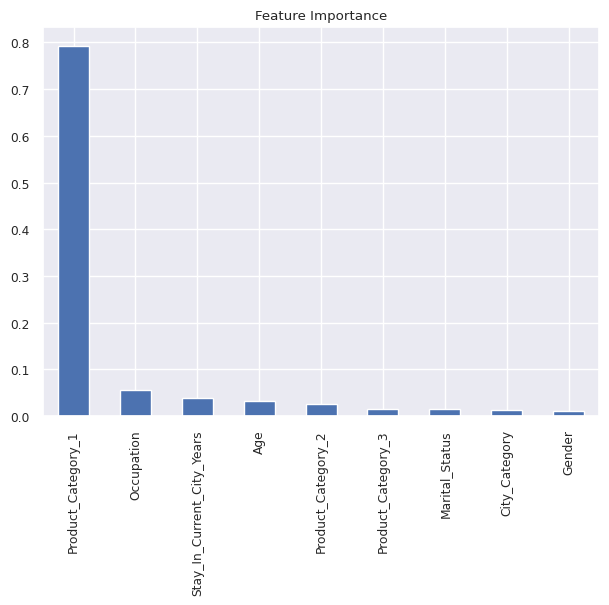

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

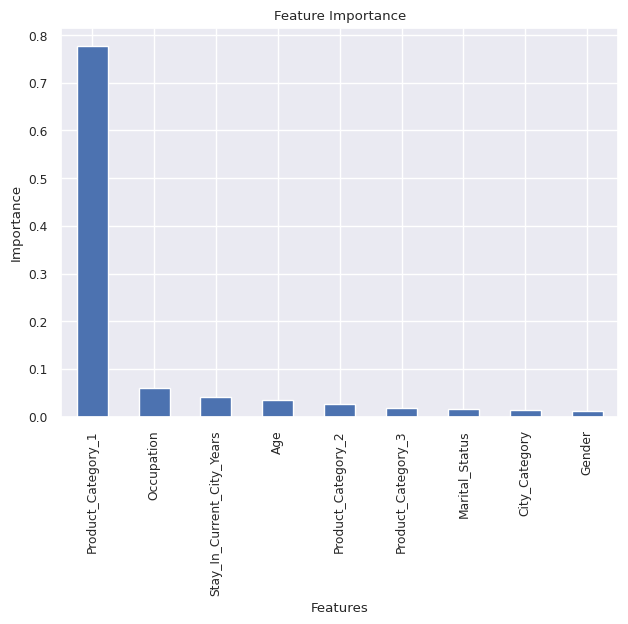

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X and y are already defined
model = RandomForestRegressor(n_jobs=-1)

# Train the model
model.fit(X, y)  # Replacing train() with fit()

# Compute feature importances
features = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
features.plot(kind='bar', title='Feature Importance')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

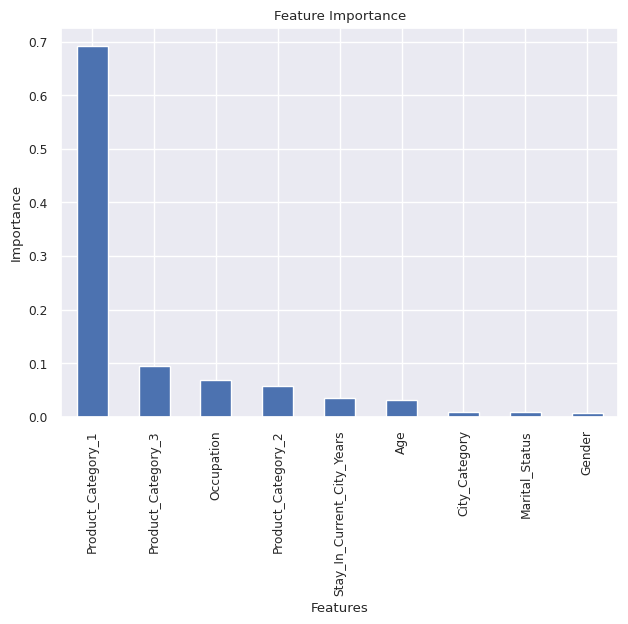

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# Assuming X and y are already defined
model = ExtraTreesRegressor(n_jobs=-1)

# Train the model
model.fit(X, y)  # Replacing train() with fit()

# Compute feature importances
features = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
features.plot(kind='bar', title='Feature Importance')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
pred = model.predict(X_test)


In [ ]:
pred = model.predict(X_test)

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df contains 'User_ID', features, and target
X = df.drop(columns=['Purchase'])  # Features
y = df['Purchase']  # Target

# Keep User_ID separately
user_ids = X['User_ID']

# Drop User_ID from training features
X = X.drop(columns=['User_ID'])

# Split data
X_train, X_test, y_train, y_test, user_train, user_test = train_test_split(
    X, y, user_ids, test_size=0.2, random_state=42
)

# Create submission with correct User_IDs
submission = pd.DataFrame()
submission['User_ID'] = user_test
submission['Purchase'] = pred

print(submission.head())


        User_ID      Purchase
84432   1001062  13225.775772
72724   1005172  12369.026062
197032  1000415   7240.781391
353704  1000496  12300.961427
91198   1002010  10768.963095


In [ ]:
submission.to_csv('submission.csv', index=False)